In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plyaer data load 및 정리(프로필)
player_df = pd.read_csv('../data/new/players_all.csv')
player_df = player_df.rename(columns={'Unnamed: 0':'Id'}).drop(['No.', 'Id'], axis=1)

In [3]:
# 1xbet data load 및 정리(스텟)
xbet_df = pd.read_csv('../data/new/1xbet_all.csv')
xbet_df = xbet_df.drop(['Team','Age','Position'], axis=1).rename(columns={'Drb_x':'Drb_Off', 'Drb_y':'Drb_Def'})

In [4]:
# understat data load 및 정리(스텟)
understat_df = pd.read_csv('../data/new/understat_all.csv')
understat_df = understat_df.drop(['No','Team'], axis=1)

In [5]:
# capology load(연봉)
capology_df = pd.read_csv('../data/new/capology_all.csv')

In [6]:
# 프로필 + 연봉
eda_df = player_df.merge(capology_df[['Weekly Salary','Base Salary','ADJ Salary','Name', 'year']], how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df = eda_df[~eda_df.duplicated(['year', 'Name'], keep='first')] # 중복 제거

In [7]:
# 프로필 + 연봉 + 스텟(understat)
eda_df = eda_df.merge(understat_df, how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])

In [8]:
# 프로필 + 연봉 + 스텟(understat) + 스텟(1xbet)
eda_df = eda_df.merge(
    xbet_df[[
        'Name', 'year', 'SpG', 'KeyP', 'Drb_Off', 'Fouled', 'Off',
        'Disp', 'UnsTch', 'Rating', 'Tackles', 'Inter','Fouls',
        'Offsides', 'Clear', 'Drb_Def', 'Blocks', 'AvgP', 'PS%']],
    how='left',
    left_on=['Name', 'year'],
    right_on=['Name', 'year']
)

In [9]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4756 non-null   int64  
 1   Name           4756 non-null   object 
 2   Age            4756 non-null   int64  
 3   Team           4756 non-null   object 
 4   Position       4756 non-null   object 
 5   Weekly Salary  4598 non-null   float64
 6   Base Salary    4598 non-null   float64
 7   ADJ Salary     4598 non-null   float64
 8   Apps           4744 non-null   float64
 9   Min            4744 non-null   float64
 10  G              4744 non-null   float64
 11  NPG            4744 non-null   float64
 12  A              4744 non-null   float64
 13  xG             4744 non-null   float64
 14  NPxG           4744 non-null   float64
 15  xA             4744 non-null   float64
 16  xGChain        4744 non-null   float64
 17  xGBuildup      4744 non-null   float64
 18  xG90    

In [10]:
eda_df = eda_df.dropna()

In [11]:
round(eda_df.describe(), 2)

,year,Age,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,NPG,A,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
count,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,...,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00
mean,2017.93,25.91,53921.12,2803898.52,3076834.48,20.58,1466.58,1.96,1.81,1.39,...,6.65,1.12,0.78,0.70,0.13,1.53,0.61,0.22,29.00,76.91
std,2.60,4.21,52782.05,2744666.44,2942732.53,11.49,1032.21,3.52,3.18,2.19,...,0.36,0.84,0.70,0.46,0.23,1.75,0.48,0.29,16.44,12.42
min,2014.00,15.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,4.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2016.00,23.00,20000.00,1040000.00,1252784.00,11.00,532.50,0.00,0.00,0.00,...,6.40,0.50,0.18,0.38,0.00,0.33,0.25,0.00,17.00,72.73
50%,2018.00,26.00,40000.00,2080000.00,2301310.00,22.00,1390.00,1.00,1.00,1.00,...,6.65,1.00,0.65,0.68,0.00,0.86,0.53,0.11,27.29,79.32
75%,2020.00,29.00,70000.00,3640000.00,4071549.00,31.00,2326.25,2.00,2.00,2.00,...,6.88,1.63,1.20,1.00,0.15,2.09,0.88,0.33,38.44,84.32
max,2022.00,41.00,600000.00,31200000.00,33671679.00,38.00,3420.00,36.00,31.00,20.00,...,8.34,7.00,4.22,4.00,2.00,11.50,4.00,2.05,90.41,100.00


<Axes: xlabel='Age', ylabel='Density'>

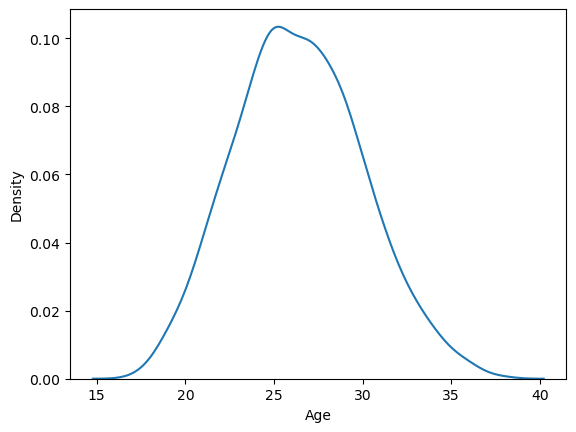

In [12]:
sns.kdeplot(data=eda_df[eda_df['Min']>1000], x='Age')

In [13]:
eda_df['Age Lev'] = eda_df['Age'].apply(lambda age: '<23' if age < 23 else '<25' if age <25 else '<27' if age<27 else '<30' if age<30 else '<33' if age<33 else '>33')

In [14]:
eda_df.tail()

,year,Name,Age,Team,Position,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%,Age Lev
4745,2022,Alex Mighten,20,Nottingham Forest,Forward,3462.0,180000.0,180000.0,1.0,5.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,1.00,100.000000,<23
4746,2022,Jamal Lewis,24,Newcastle,Defender,38000.0,1976000.0,1976000.0,2.0,4.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.00,85.714286,<25
4747,2022,Maximo Perrone,19,Man City,Midfielder,30000.0,1560000.0,1560000.0,1.0,17.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,20.00,90.000000,<23
4750,2022,Nathaniel Chalobah,27,Fulham,Midfielder,35000.0,1820000.0,1820000.0,4.0,10.0,...,0.25,0.0,0.5,0.0,0.5,0.0,0.0,1.25,80.000000,<30
4754,2022,Shane Duffy,30,Fulham,Defender,40000.0,2080000.0,2080000.0,5.0,16.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.00,80.000000,<33


In [15]:
static_df = eda_df[eda_df['Min']>1500].groupby(['Position', 'Age Lev']).mean(numeric_only=True)
static_df

year        Age  Weekly Salary   Base Salary  \
Position   Age Lev                                                        
Defender   <23      2018.208333  20.937500   39674.885417  2.063094e+06   
           <25      2018.386861  23.583942   55395.423358  2.880562e+06   
           <27      2017.827381  25.482143   51796.702381  2.693429e+06   
           <30      2017.884615  27.952991   59403.675214  3.088991e+06   
           <33      2018.111111  30.833333   58106.972222  3.021562e+06   
           >33      2016.906977  34.000000   56290.697674  2.927116e+06   
Forward    <23      2017.904110  20.863014   74593.767123  3.878877e+06   
           <25      2018.185714  23.542857   81212.928571  4.223071e+06   
           <27      2017.738636  25.465909   82777.750000  4.304443e+06   
           <30      2017.880734  27.972477   96257.587156  5.005394e+06   
           <33      2018.767442  30.581395  108162.348837  5.624442e+06   
           >33      2018.166667  34.000000  120416.666667  6.261667e+06   
Goalkeeper <23      2018.909091  21.454545   24545.454545  1.276364e+06   
           <25      2017.705882  23.647059   84558.823529  4.397059e+06   
           <27      2017.619048  25.523810   73333.333333  3.813333e+06   
           <30      2017.846154  27.984615   69428.692308  3.610292e+06   
           <33      2017.947368  30.868421   78154.868421  4.064053e+06   
           >33      2018.230769  34.358974   60897.435897  3.166667e+06   
Midfielder <23      2018.504673  20.971963   54873.289720  2.853411e+06   
           <25      2018.097222  23.555556   59596.152778  3.099000e+06   
           <27      2017.818713  25.467836   67623.929825  3.516444e+06   
           <30      2017.857820  27.909953   77684.383886  4.039588e+06   
           <33      2017.777778  30.737374   80831.010101  4.203212e+06   
           >33      2017.952381  33.809524   95846.142857  4.984000e+06   

                      ADJ Salary       Apps          Min          G       NPG  \
Position   Age Lev                                                              
Defender   <23      2.263488e+06  28.395833  2334.572917   0.854167  0.854167   
           <25      3.119764e+06  28.773723  2418.335766   1.109489  1.109489   
           <27      2.982028e+06  29.142857  2457.303571   1.154762  1.148810   
           <30      3.389427e+06  28.987179  2463.782051   1.145299  1.123932   
           <33      3.307410e+06  29.138889  2468.465278   1.097222  1.069444   
           >33      3.287142e+06  27.069767  2255.837209   1.116279  1.116279   
Forward    <23      4.239725e+06  32.095890  2241.931507   7.986301  7.479452   
           <25      4.654376e+06  32.300000  2395.271429   9.257143  8.700000   
           <27      4.792931e+06  32.261364  2440.579545   9.954545  8.931818   
           <30      5.512200e+06  32.678899  2375.752294  10.311927  9.155963   
           <33      6.101030e+06  32.046512  2275.767442   9.581395  8.302326   
           >33      6.634285e+06  32.166667  2214.000000  10.750000  8.583333   
Goalkeeper <23      1.427338e+06  33.545455  3010.818182   0.000000  0.000000   
           <25      4.958839e+06  31.941176  2866.705882   0.000000  0.000000   
           <27      4.280296e+06  31.857143  2846.619048   0.000000  0.000000   
           <30      3.952947e+06  31.753846  2848.476923   0.015385  0.015385   
           <33      4.408228e+06  29.894737  2683.289474   0.000000  0.000000   
           >33      3.434263e+06  31.435897  2810.051282   0.000000  0.000000   
Midfielder <23      3.072916e+06  31.177570  2299.728972   3.794393  3.607477   
           <25      3.421534e+06  30.993056  2350.027778   3.541667  3.326389   
           <27      3.882191e+06  31.695906  2413.631579   3.391813  3.087719   
           <30      4.459959e+06  30.682464  2331.568720   2.843602  2.459716   
           <33      4.572442e+06  30.191919  2282.282828   2.272727  1.939394   
           >33      5.527751e+06  29.190476  2173.0

In [16]:
cond1 = eda_df['Name']=='Son Heung-Min'
cond2 = eda_df['year']==2016
player = eda_df[cond1 & cond2]

In [17]:
player['Position']

1142    Forward
Name: Position, dtype: object

In [18]:
player['Age Lev']

1142    <25
Name: Age Lev, dtype: object

In [19]:
(player['Position'].values[0], player['Age Lev'].values[0])

('Forward', '<25')

In [20]:
static_df.index

MultiIndex([(  'Defender', '<23'),
            (  'Defender', '<25'),
            (  'Defender', '<27'),
            (  'Defender', '<30'),
            (  'Defender', '<33'),
            (  'Defender', '>33'),
            (   'Forward', '<23'),
            (   'Forward', '<25'),
            (   'Forward', '<27'),
            (   'Forward', '<30'),
            (   'Forward', '<33'),
            (   'Forward', '>33'),
            ('Goalkeeper', '<23'),
            ('Goalkeeper', '<25'),
            ('Goalkeeper', '<27'),
            ('Goalkeeper', '<30'),
            ('Goalkeeper', '<33'),
            ('Goalkeeper', '>33'),
            ('Midfielder', '<23'),
            ('Midfielder', '<25'),
            ('Midfielder', '<27'),
            ('Midfielder', '<30'),
            ('Midfielder', '<33'),
            ('Midfielder', '>33')],
           names=['Position', 'Age Lev'])

In [21]:
static_df.loc[(player['Position'].values[0], player['Age Lev'].values[0])]

year             2.018186e+03
Age              2.354286e+01
Weekly Salary    8.121293e+04
Base Salary      4.223071e+06
ADJ Salary       4.654376e+06
Apps             3.230000e+01
Min              2.395271e+03
G                9.257143e+00
NPG              8.700000e+00
A                4.214286e+00
xG               9.363714e+00
NPxG             8.766000e+00
xA               4.397571e+00
xGChain          1.511243e+01
xGBuildup        4.800714e+00
xG90             3.434286e-01
NPxG90           3.225714e-01
xA90             1.635714e-01
xG90+xA90        5.068571e-01
NPxG90+xA90      4.864286e-01
xGChain90        5.590000e-01
xGBuildup90      1.771429e-01
SpG              2.068004e+00
KeyP             1.095976e+00
Drb_Off          1.621802e+00
Fouled           1.262916e+00
Off              4.538322e-01
Disp             1.656487e+00
UnsTch           2.282548e+00
Rating           7.007853e+00
Tackles          8.726359e-01
Inter            4.122354e-01
Fouls            9.527259e-01
Offsides  

In [22]:
r = pd.DataFrame(data=static_df.loc[(player['Position'].values[0], player['Age Lev'].values[0])]).T
round(r,2)

,,year,Age,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,NPG,A,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
Forward,<25,2018.19,23.54,81212.93,4223071.43,4654375.57,32.3,2395.27,9.26,8.7,4.21,...,7.01,0.87,0.41,0.95,0.01,0.5,0.66,0.07,22.63,74.39


In [23]:
player[r.columns]

,year,Age,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,NPG,A,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
1142,2016,24,85000.0,4420000.0,5139717.0,34.0,2069.0,14.0,14.0,6.0,...,7.132647,0.558824,0.235294,0.264706,0.0,0.176471,0.588235,0.029412,22.823529,81.185567


In [40]:
static2_df = eda_df[eda_df['Min']>1000].groupby(['Position', 'Age Lev', 'year']).mean(numeric_only=True)
y1 = static2_df.loc[('Forward', '<33'), 'Apps']
y1

year
2014    23.500000
2015    28.166667
2016    29.400000
2017    31.200000
2018    28.375000
2019    29.100000
2020    27.142857
2021    28.900000
2022    32.272727
Name: Apps, dtype: float64

In [42]:
static2_df = eda_df[eda_df['Min']>1000].groupby(['Position', 'Age Lev', 'year']).mean(numeric_only=True)
y2 = static2_df.loc[('Forward', '<30'), 'Apps']
y2

year
2014    30.000000
2015    28.812500
2016    28.450000
2017    29.428571
2018    31.071429
2019    31.555556
2020    29.428571
2021    30.692308
2022    31.111111
Name: Apps, dtype: float64

<Axes: >

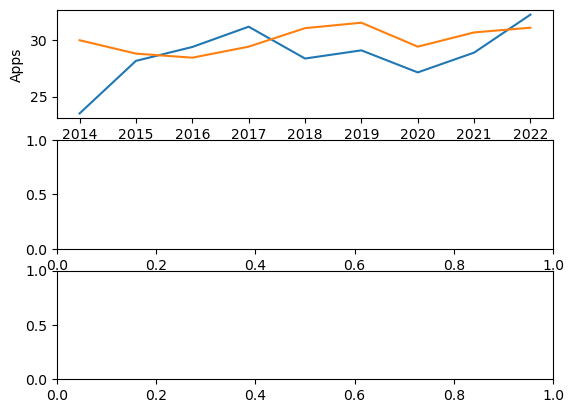

In [45]:
plt.subplot(3,1,1)
sns.lineplot(x=range(2014,2022+1), y=y1) # <33
sns.lineplot(x=range(2014,2022+1), y=y2) # <30
plt.subplot(3,1,2)
plt.subplot(3,1,3)